In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import the dataset
dataset=pd.read_excel("Folds5x2_pp.xlsx")

<Axes: >

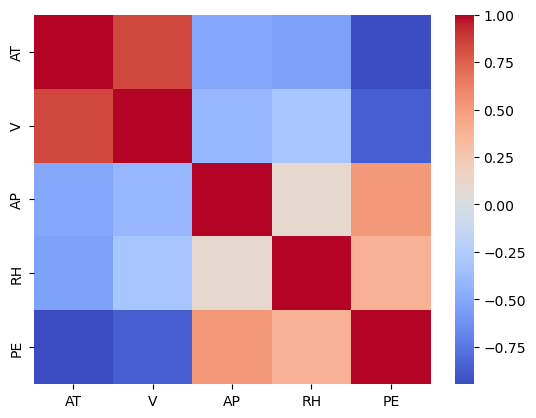

In [5]:
#Plot the correlation matrix
df_corr=dataset.corr()
sns.heatmap(df_corr,cmap='coolwarm')

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [10]:
dataset.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [7]:
print(X)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]


In [8]:
print(y)

[463.26 444.37 488.56 ... 429.57 435.74 453.28]


In [11]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
#Building the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
ann=Sequential()
ann.add(Dense(units=6,activation='relu'))      
ann.add(Dense(units=6,activation='relu'))
ann.add(Dense(units=1))

In [19]:
#Compile the ANN
ann.compile(optimizer='adam',loss='mean_squared_error')

In [20]:
#Train the ANN model on the training set
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
240/240 [==============================] - 0s 768us/step - loss: 206544.6406
Epoch 2/100
240/240 [==============================] - 0s 749us/step - loss: 203696.8750
Epoch 3/100
240/240 [==============================] - 0s 739us/step - loss: 194574.0625
Epoch 4/100
240/240 [==============================] - 0s 744us/step - loss: 176225.2500
Epoch 5/100
240/240 [==============================] - 0s 755us/step - loss: 150063.6250
Epoch 6/100
240/240 [==============================] - 0s 745us/step - loss: 125029.0469
Epoch 7/100
240/240 [==============================] - 0s 733us/step - loss: 108607.9219
Epoch 8/100
240/240 [==============================] - 0s 763us/step - loss: 99280.1641
Epoch 9/100
240/240 [==============================] - 0s 742us/step - loss: 90715.5547
Epoch 10/100
240/240 [==============================] - 0s 722us/step - loss: 79122.6875
Epoch 11/100
240/240 [==============================] - 0s 725us/step - loss: 64217.9570
Epoch 12/100
240/240 [=

In [22]:
#Test Set Loss
loss = ann.evaluate(X_test, y_test)

60/60 [==============================] - 0s 679us/step - loss: 20.4513


In [23]:
#Predict the test set results
y_pred=ann.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

60/60 [==============================] - 0s 613us/step
[[455.65 455.27]
 [438.37 436.31]
 [433.79 440.68]
 ...
 [482.54 479.53]
 [435.   435.76]
 [458.54 457.1 ]]
